# Data exploration notebook

## Imports

In [336]:
# Utils
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Typing
from typing import List

# Data
import pandas_datareader as pdr
import quandl

## Data acquisition

In [2]:
df_aapl_ggl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
df_aapl_yh = pdr.get_data_yahoo('AAPL', start=dt.datetime(2006, 10, 1), end=dt.datetime(2012, 1, 1))

## Data exploration

### Sandbox

In [102]:
df_aapl_ggl.head()

Open    High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2006-10-02  75.10  75.870  74.30  74.86  25451400.0          0.0          1.0   
2006-10-03  74.45  74.950  73.19  74.07  28239600.0          0.0          1.0   
2006-10-04  74.10  75.462  73.16  75.38  29610100.0          0.0          1.0   
2006-10-05  74.53  76.160  74.13  74.83  24424400.0          0.0          1.0   
2006-10-06  74.42  75.040  73.81  74.22  16677100.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
2006-10-02   9.651397   9.750352  9.548586    9.620553  178159800.0  
2006-10-03   9.567863   9.632120  9.405935    9.519027  197677200.0  
2006-10-04   9.522883   9.697919  9.402080    9.687381  207270700.0  
2006-10-05   9.578144   9.787621  9.526738    9.616698  170970800.0  
2006-10-06   9.564007   9.643686  9.485614    9.538304  116739700.0

In [27]:
df_aapl_yh.head()

High       Low      Open     Close     Volume  Adj Close
Date                                                                    
2006-10-02  2.709643  2.653571  2.682143  2.673571  712639200   2.310338
2006-10-03  2.676786  2.613929  2.658929  2.645714  790708800   2.286266
2006-10-04  2.695000  2.612857  2.646429  2.692143  829082800   2.326385
2006-10-05  2.720000  2.647500  2.661786  2.672500  683883200   2.309412
2006-10-06  2.680000  2.636071  2.657857  2.650714  466958800   2.290586

In [30]:
df_aapl_yh.loc["2011-10"].head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2011-10-03  13.665714  13.327500  13.584642  13.378572   669099200  11.560946
2011-10-04  13.635715  12.651428  13.377500  13.303572  1233677200  11.496137
2011-10-05  13.565000  12.867857  13.137857  13.508928   786469600  11.673594
2011-10-06  13.742143  13.278571  13.333215  13.477500   812582400  11.646437
2011-10-07  13.490714  13.160357  13.420714  13.207143   535458000  11.412808

In [42]:
df_aapl_yh.resample('M').mean().head()

High       Low      Open     Close        Volume  Adj Close
Date                                                                       
2006-10-31  2.780942  2.723279  2.750731  2.754497  6.539980e+08   2.380269
2006-11-30  3.078656  3.007245  3.040391  3.048027  6.588040e+08   2.633920
2006-12-31  3.136625  3.051393  3.103964  3.088268  8.445396e+08   2.668693
2007-01-31  3.220214  3.130643  3.180589  3.174339  1.360489e+09   2.743071
2007-02-28  3.095733  3.027951  3.063026  3.061711  7.222292e+08   2.645744

In [101]:
df_aapl_yh['diff'] = df_aapl_yh['Open'] - df_aapl_yh['Close']
df_aapl_yh.head()

High       Low      Open     Close     Volume  Adj Close  \
Date                                                                       
2006-10-02  2.709643  2.653571  2.682143  2.673571  712639200   2.310338   
2006-10-03  2.676786  2.613929  2.658929  2.645714  790708800   2.286266   
2006-10-04  2.695000  2.612857  2.646429  2.692143  829082800   2.326385   
2006-10-05  2.720000  2.647500  2.661786  2.672500  683883200   2.309412   
2006-10-06  2.680000  2.636071  2.657857  2.650714  466958800   2.290586   

                diff  
Date                  
2006-10-02  0.008572  
2006-10-03  0.013214  
2006-10-04 -0.045714  
2006-10-05 -0.010714  
2006-10-06  0.007143

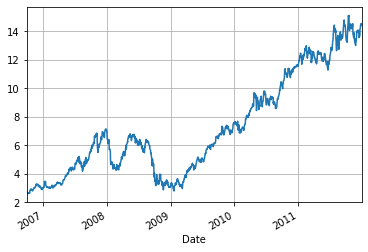

In [110]:
df_aapl_yh['Close'].plot(grid=True).autoscale(axis='x', tight=True)

### Daily/Monthly returns

In [59]:
df_daily_close = df_aapl_yh[['Adj Close']]

In [99]:
df_daily_pct_chg = df_daily_close.pct_change().fillna(0.0)
df_daily_pct_chg.head()

Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017548
2006-10-05  -0.007296
2006-10-06  -0.008152

In [80]:
np.log(df_daily_close.pct_change()+1).fillna(0.0).head()

Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010474
2006-10-04   0.017396
2006-10-05  -0.007323
2006-10-06  -0.008185

In [98]:
df_monthly = df_aapl_yh.resample('M').apply(lambda x: x[-1]).pct_change().fillna(0.0)  # Applied function takes most recent observation (i.e. final observation) per month
df_monthly.head()

High       Low      Open     Close    Volume  Adj Close  \
Date                                                                      
2006-10-31  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
2006-11-30  0.134672  0.134987  0.132106  0.130488  0.735854   0.130488   
2006-12-31 -0.078550 -0.084560 -0.089578 -0.074405  0.236584  -0.074405   
2007-01-31  0.007026  0.011876  0.010840  0.010490 -0.204714   0.010490   
2007-02-28 -0.004651 -0.016005 -0.021918 -0.013064  0.074066  -0.013064   

                diff  
Date                  
2006-10-31  0.000000  
2006-11-30  0.486477  
2006-12-31 -2.618185  
2007-01-31 -0.022472  
2007-02-28  0.850579

In [97]:
df_qtrly = df_aapl_yh.resample('Q').apply(lambda x: x[-1]).pct_change().fillna(0.0)
df_qtrly.head()

High       Low      Open     Close    Volume  Adj Close  \
Date                                                                      
2006-12-31  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
2007-03-31  0.108665  0.112644  0.123049  0.095120 -0.442083   0.095120   
2007-06-30  0.309675  0.305553  0.293700  0.313529  0.894641   0.313529   
2007-09-30  0.246774  0.261458  0.258014  0.257538 -0.459414   0.257538   
2007-12-31  0.296895  0.294599  0.300182  0.290676 -0.123180   0.290676   

                 diff  
Date                   
2006-12-31   0.000000  
2007-03-31  -2.539330  
2007-06-30  -1.051096  
2007-09-30  -0.571429  
2007-12-31 -48.332443

array([[<AxesSubplot:title={'center':'Adj Close'}>]], dtype=object)

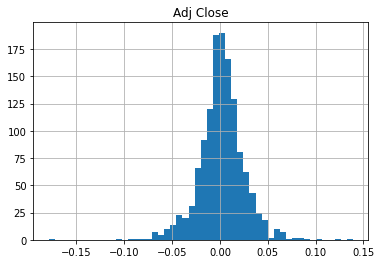

In [92]:
df_daily_pct_chg.hist(bins=50)

In [93]:
df_daily_pct_chg.describe()

Adj Close
count  1323.000000
mean      0.001565
std       0.023983
min      -0.179195
25%      -0.010661
50%       0.001646
75%       0.014285
max       0.139049

In [111]:
df_cum_daily_return = (df_daily_pct_chg + 1).cumprod()
df_cum_daily_return.head()

Adj Close
Date                 
2006-10-02   1.000000
2006-10-03   0.989581
2006-10-04   1.006946
2006-10-05   0.999599
2006-10-06   0.991451

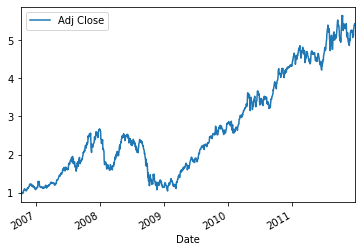

In [112]:
df_cum_daily_return.plot().autoscale(axis='x', tight=True)

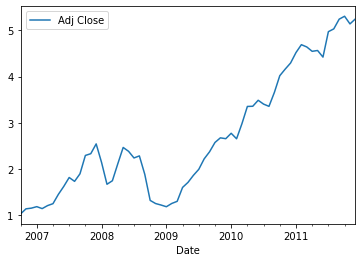

In [114]:
df_cum_monthly_return = df_cum_daily_return.resample('M').mean()
df_cum_monthly_return.plot().autoscale(axis='x', tight=True)

### Multiple stocks

In [170]:
def get_tickers_data_yahoo(tickers: List[str], start: dt.datetime, end: dt.datetime) -> pd.DataFrame:
    f = lambda ticker: pdr.get_data_yahoo(ticker, start=start, end=end)
    data = map(f, tickers)
    return(pd.concat(data, keys=tickers, names=['Ticker', 'Date']))

In [171]:
tickers = ['AAPL', 'GOOG', 'IBM', 'MSFT']

df_data = get_tickers_data_yahoo(tickers, dt.datetime(2006, 10, 1), dt.datetime(2020, 1, 1))

In [172]:
df_daily_close_comp = df_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
df_daily_close_comp.head()

Ticker          AAPL        GOOG        IBM       MSFT
Date                                                  
2006-10-02  2.310338  199.970459  54.738338  20.153618
2006-10-03  2.286266  201.265610  54.591251  20.160980
2006-10-04  2.326385  207.073837  55.560726  20.580849
2006-10-05  2.309412  205.136093  55.440342  20.566118
2006-10-06  2.290586  209.464874  55.587467  20.529287

In [173]:
df_daily_pct_chg_comp = df_daily_close_comp.pct_change()
df_daily_pct_chg_comp.head()

Ticker          AAPL      GOOG       IBM      MSFT
Date                                              
2006-10-02       NaN       NaN       NaN       NaN
2006-10-03 -0.010419  0.006477 -0.002687  0.000365
2006-10-04  0.017548  0.028859  0.017759  0.020826
2006-10-05 -0.007296 -0.009358 -0.002167 -0.000716
2006-10-06 -0.008152  0.021102  0.002654 -0.001791

<AxesSubplot:xlabel='Date'>

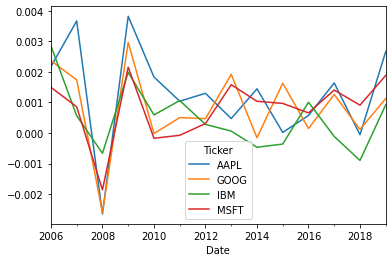

In [197]:
df_daily_pct_chg_comp.resample('Y').mean().plot()

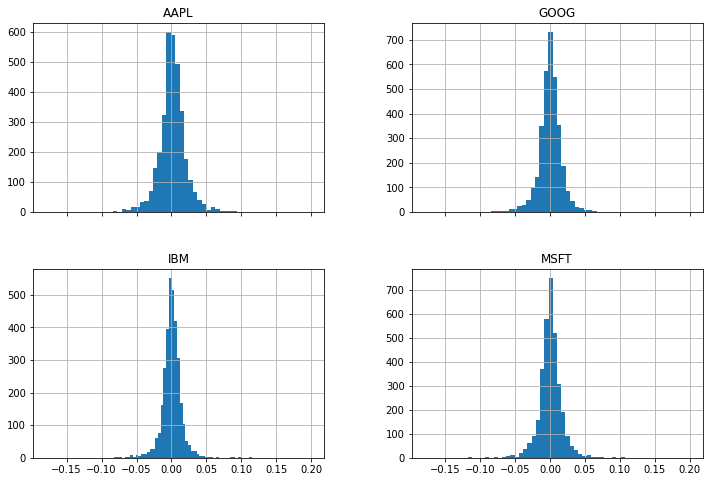

In [174]:
df_daily_pct_chg_comp.hist(bins=50, sharex=True, figsize=(12, 8))
plt.show()

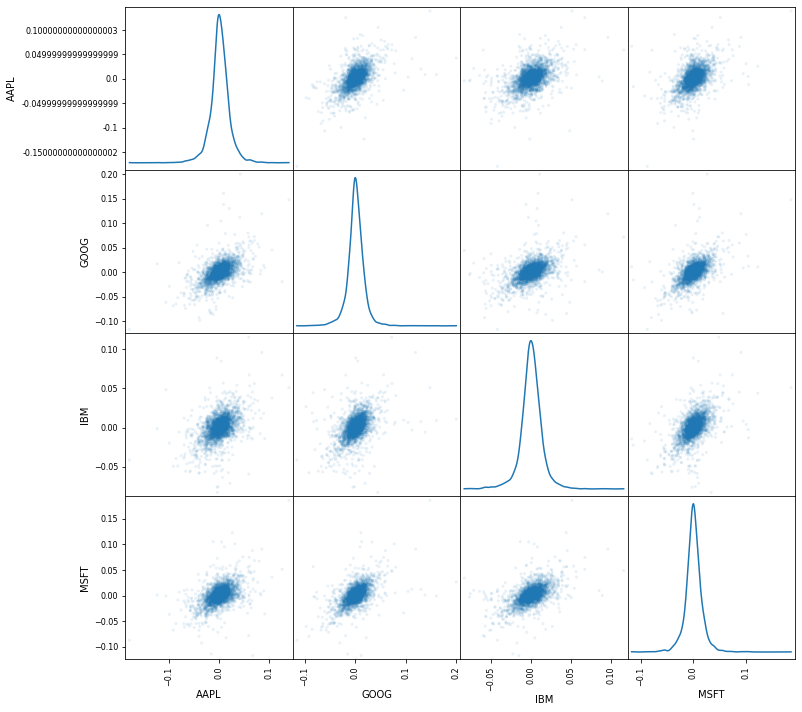

In [199]:
scat = pd.plotting.scatter_matrix(df_daily_pct_chg_comp, diagonal='kde', alpha=0.1, figsize=(12, 12), grid=True)  # alpha sets transparency
plt.show()

### Rolling windows

In [301]:
df_daily_close = df_aapl_yh[['Adj Close']]
df_daily_close.tail()

Adj Close
Date                 
2011-12-23  12.447616
2011-12-27  12.546378
2011-12-28  12.426320
2011-12-29  12.502859
2011-12-30  12.499158

In [302]:
df_roll_mean = pd.DataFrame()  # This line not necessarily required, just helpful during development to reset the dataframe and avoid SettingWithCopyWarnings
df_roll_mean['Adj Close'] = df_daily_close['Adj Close']
df_roll_mean['30 Roll Mean'] = df_daily_close['Adj Close'].rolling(window=30).mean()
df_roll_mean['365 Roll Mean'] = df_daily_close['Adj Close'].rolling(window=365).mean()

In [303]:
df_roll_mean.tail()

Adj Close  30 Roll Mean  365 Roll Mean
2011-12-23  12.447616     11.861010      10.475852
2011-12-27  12.546378     11.883550      10.489461
2011-12-28  12.426320     11.907602      10.502207
2011-12-29  12.502859     11.924360      10.514965
2011-12-30  12.499158     11.945171      10.527308

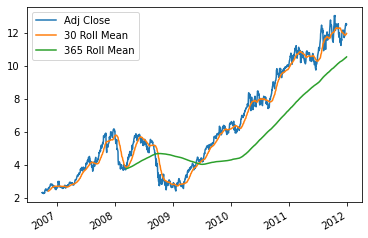

In [305]:
df_roll_mean.plot()
plt.show()

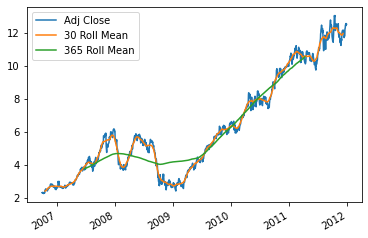

In [307]:
df_roll_mean_shift['Adj Close'] = df_roll_mean['Adj Close']
df_roll_mean_shift['30 Roll Mean'] = df_roll_mean['30 Roll Mean'].shift(-15)  # Centres the rolling mean over the middle of the window to essentially show "smoothing"
df_roll_mean_shift['365 Roll Mean'] = df_roll_mean['365 Roll Mean'].shift(-182)  # n.b. this is better done using parameter center=True in the rolling() function
df_roll_mean_shift.plot()
plt.show()

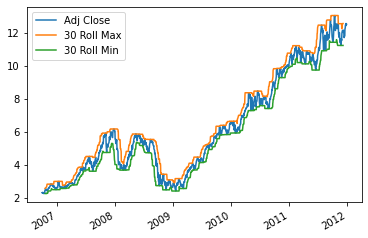

In [309]:
df_roll_max_min = pd.DataFrame()
df_roll_max_min['Adj Close'] = df_daily_close['Adj Close']
df_roll_max_min['30 Roll Max'] = df_daily_close['Adj Close'].rolling(window=30).max().shift(-15)
df_roll_max_min['30 Roll Min'] = df_daily_close['Adj Close'].rolling(window=30).min().shift(-15)
df_roll_max_min.plot()
plt.show()

### Volatility

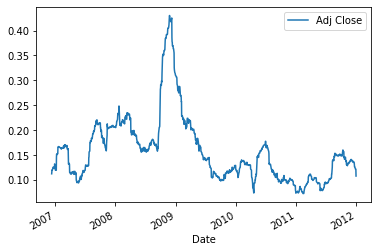

In [315]:
min_periods = 50
vol = df_daily_pct_chg.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.plot()
plt.show()

### Ordinary least squares regression

In [325]:
df_adj_close = df_data[['Adj Close']]

df_returns = np.log(df_adj_close / df_adj_close.shift(1))

df_aapl_returns = df_returns.iloc[df_returns.index.get_level_values('Ticker') == 'AAPL']
df_aapl_returns.index = df_aapl_returns.index.droplevel('Ticker')

df_msft_returns = df_returns.iloc[df_returns.index.get_level_values('Ticker') == 'MSFT']
df_msft_returns.index = df_msft_returns.index.droplevel('Ticker')

df_returns = pd.concat([df_aapl_returns, df_msft_returns], axis=1)[1:] # [1:] removes NaNs that may interfere
df_returns.columns = ['AAPL', 'MSFT']

# Add constant
X = sm.add_constant(df_returns['AAPL'])

# Construct model
mod_ols = sm.OLS(df_returns['MSFT'], X).fit()


print(mod_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     1033.
Date:                Sun, 27 Sep 2020   Prob (F-statistic):          1.16e-197
Time:                        16:27:40   Log-Likelihood:                 9344.4
No. Observations:                3334   AIC:                        -1.868e+04
Df Residuals:                    3332   BIC:                        -1.867e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.724      0.4

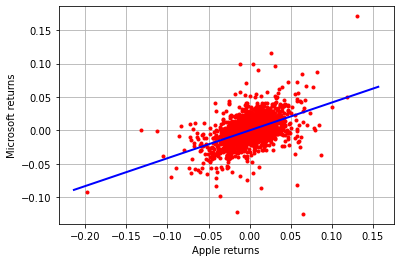

In [327]:
plt.plot(df_returns['AAPL'], df_returns['MSFT'], 'r.')

# Add axis to the plot
ax = plt.axis()

# Initialize x
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, mod_ols.params[0] + mod_ols.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple returns')
plt.ylabel('Microsoft returns')

plt.show()

#### Rolling correlation

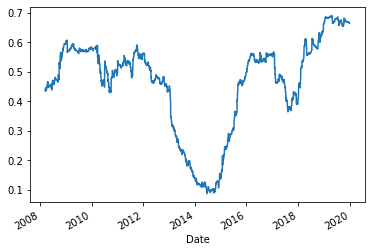

In [334]:
df_returns['AAPL'].rolling(window=365).corr(df_returns['MSFT']).plot()

plt.show()